# Stationary Vs Non-Stationary Time Series

Stationary Series has a property where it's mean, variance and auto-correlation doesnt vary with time (no trend/seasonality).

A series is said to be non-stationary if it's not constant around a particular value and consists of trends/seasonality...

How to check if the series is stationary or non-stationary??
- Use statistical methods like KPSS or ADF
- Try converting the series to stationary by using a diff() or a shift() (removes trend)
- If the weakly stationary series is not seasonal, apply ARIMA for forecasting else go for Seasonal ARIMA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

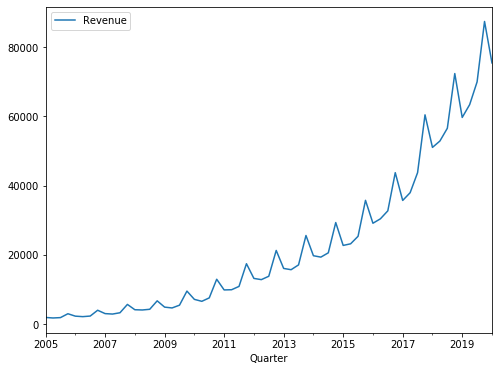

In [2]:
def convert_datetime(x):
    return datetime.strptime(x, '%m/%d/%Y')

data = pd.read_csv('amazon_revenue_profit.csv', parse_dates = ['Quarter'], date_parser = convert_datetime)

data.plot(x = 'Quarter', y = 'Revenue', figsize = (8,6))

###### Insight:
    The above plot shows the upward trend and has some seasonality. It's clear that the series isnt stationary!
Let's run statistical tests to check the same.

### KPSS test

Null hypothesis - Series is stationary

Alternate hypothesis - Series is not stationary

In [3]:
from statsmodels.tsa.stattools import kpss

In [4]:
stats, p, lags, critical_values = kpss(data['Revenue'], 'ct') # data has a trend component hence 'ct' is used. 

/home/supriya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


In [5]:
print('KPSS Test Statistics: {}'.format(stats))
print('p-value: {}'.format(p))
print('Critial Values: {}'.format(critical_values))

if p < 0.05 :
  print('Series is not Stationary, rejecting NULL hypothesis')
else:
  print('Series is Stationary')

KPSS Test Statistics: 0.1700516821083097
p-value: 0.029956931576408573
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary, rejecting NULL hypothesis


### ADF test

Null Hypothesis - Series possesses a unit root and hence is not stationary

Alternate Hypothesis - Series is stationary

In [6]:
from statsmodels.tsa.stattools import adfuller

In [9]:
result = adfuller(data['Revenue'])

print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary, accept NULL hypothesis')
else:
  print('Series is Stationary')

Test Statistics: -2.4448360381972423
p-value: 0.12947943121838534
Critial Values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
Series is not Stationary, accept NULL hypothesis




    Since the statistical tests also predict that the series is non stationary, we have to use some diff() shift() methods to remove the trend and make it weakly stationary... so we could apply ARIMA for forecasting!